Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')
Average final grade (G3): 10.415189873417722
Number of students who scored above 15: 40
Correlation between study time and G3: 0.09781968965319633
Average G3 by gender:
sex
F     9.966346
M    10.914439
Name: G3, dtype: float64


C:\ProgramData\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


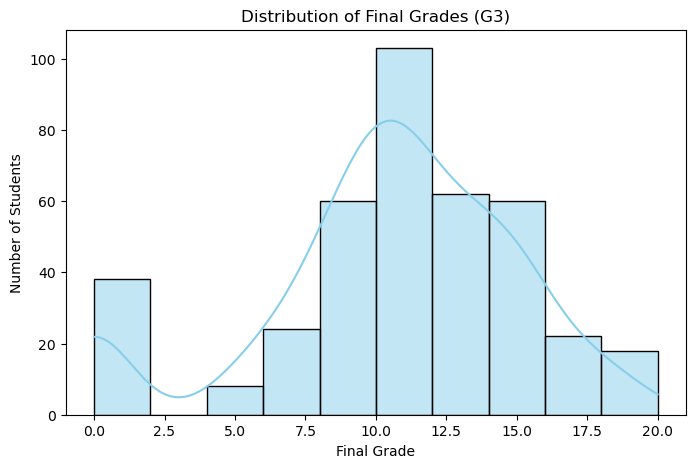

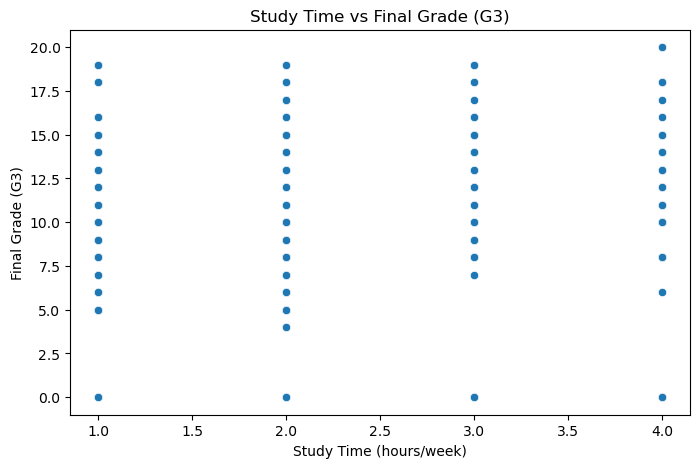

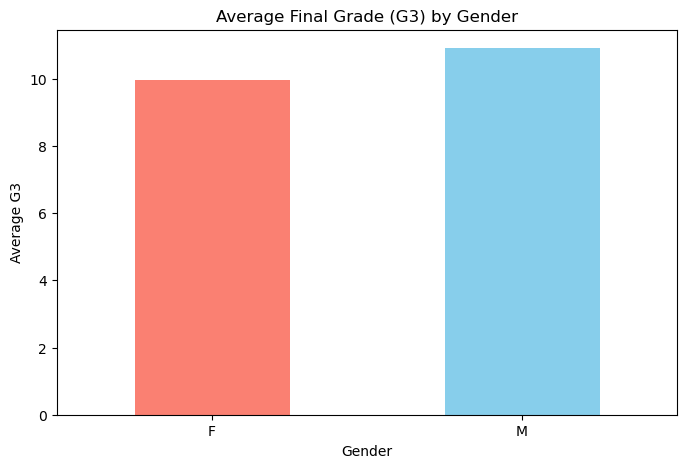

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("student-mat.csv", sep=';')

df.head()
print(df.columns)

df.rename(columns=lambda x: x.strip(), inplace=True)



df.isnull().sum()
df.dtypes
df.shape

df = df.dropna()
df = df.drop_duplicates()
df.shape

average_g3 = df['G3'].mean()
print(f"Average final grade (G3): {average_g3}")

above_15_count = df[df['G3'] > 15].shape[0]
print(f"Number of students who scored above 15: {above_15_count}")

correlation = df['studytime'].corr(df['G3'])
print(f"Correlation between study time and G3: {correlation}")

gender_avg = df.groupby('sex')['G3'].mean()
print("Average G3 by gender:")
print(gender_avg)

plt.figure(figsize=(8, 5))
sns.histplot(df['G3'], bins=10, kde=True, color='skyblue')
plt.title("Distribution of Final Grades (G3)")
plt.xlabel("Final Grade")
plt.ylabel("Number of Students")
plt.show()

plt.figure(figsize=(8, 5))
sns.scatterplot(x='studytime', y='G3', data=df)
plt.title("Study Time vs Final Grade (G3)")
plt.xlabel("Study Time (hours/week)")
plt.ylabel("Final Grade (G3)")
plt.show()

plt.figure(figsize=(8, 5))
gender_avg.plot(kind='bar', color=['salmon', 'skyblue'])
plt.title("Average Final Grade (G3) by Gender")
plt.xlabel("Gender")
plt.ylabel("Average G3")
plt.xticks(rotation=0)
plt.show()
